<a href="https://colab.research.google.com/github/pontabi/scrapbook/blob/main/ipynbs/pd_plt_practice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=b4ba3055bb7d0bae7c65cb774871e97f9d87bde30fa8b1330839463e6d9c785b
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [2]:
import pandas as pd

df = pd.read_csv("/content/Video Views (2).csv")
df.head()

,日付,時,分,視聴回数
0,2023/4/28,18,30,0
1,2023/4/29,11,30,103261
2,2023/4/29,12,0,104628
3,2023/4/29,12,30,106329
4,2023/4/29,13,0,109468


In [3]:
df_day = df[(df['時'] == 18) & (df['分'] == 30)]
df_day.head()

,日付,時,分,視聴回数
0,2023/4/28,18,30,0
15,2023/4/29,18,30,130213
63,2023/4/30,18,30,202782
111,2023/5/1,18,30,286482
159,2023/5/2,18,30,346963


In [4]:
df_day = df_day.reset_index(drop=True)
df_day.head()

,日付,時,分,視聴回数
0,2023/4/28,18,30,0
1,2023/4/29,18,30,130213
2,2023/4/30,18,30,202782
3,2023/5/1,18,30,286482
4,2023/5/2,18,30,346963


In [5]:
X_dt = pd.to_datetime(df_day['日付'])

In [13]:
import datetime
x_jiku = []
for i in range(8):
  x_jiku.append(X_dt[0] + datetime.timedelta(days=7) * i)

print(x_jiku)
x_jiku_str = []
for x in x_jiku:
  x_jiku_str.append(x.strftime("%m/%d"))

print(x_jiku_str)

[Timestamp('2023-04-28 00:00:00'), Timestamp('2023-05-05 00:00:00'), Timestamp('2023-05-12 00:00:00'), Timestamp('2023-05-19 00:00:00'), Timestamp('2023-05-26 00:00:00'), Timestamp('2023-06-02 00:00:00'), Timestamp('2023-06-09 00:00:00'), Timestamp('2023-06-16 00:00:00')]
['04/28', '05/05', '05/12', '05/19', '05/26', '06/02', '06/09', '06/16']


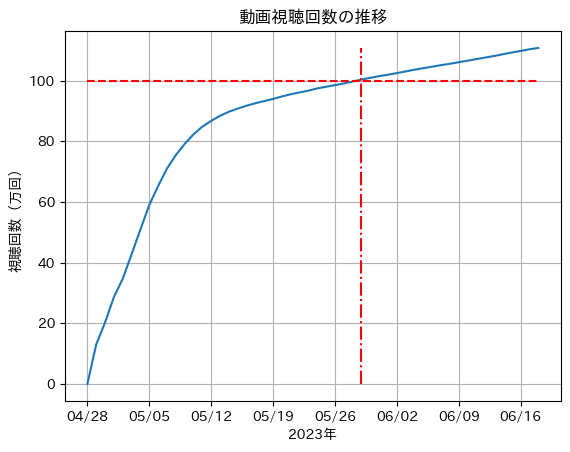

In [54]:
import matplotlib.pyplot as plt
import japanize_matplotlib

fig, ax = plt.subplots()
ax.plot(X_dt, df_day["視聴回数"])

# set_ticks, set_label
# set_xticks(値のリスト, 表記のリスト)
ax.set_yticks(list(range(0, 1200000, 200000)), list(range(0, 120, 20)))
ax.set_ylabel("視聴回数（万回）")
ax.set_xticks(x_jiku, x_jiku_str)
ax.set_xlabel("2023年")
ax.set_title("動画視聴回数の推移")

ax.grid()

# hlines
# hlines([y_value], x始点, x終点, colors, linestle)
ax.hlines([1000000], X_dt[0], X_dt[len(X_dt)-1], color="red", linestyle="dashed")

# vlines
dfx = df_day[df_day["視聴回数"]>= 1000000]
day0 = X_dt[dfx.index[0]]
y0 = df_day.iloc[len(df_day)-1]["視聴回数"]
ax.vlines([day0], 0, y0, color="red", linestyle="dashdot")
plt.show()

# linestyle = "dashed", "solid", "dashdot", "dot"

In [51]:
dfx = df_day[df_day["視聴回数"]>= 1000000]
day0 = X_dt[dfx.index[0]]
print(day0)
y0 = df_day.iloc[len(df_day)-1]["視聴回数"]
print(y0)

2023-05-29 00:00:00
1107782


In [15]:
x = list(range(10))
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [16]:
y = []
for x0 in x:
  y.append(x0**2)

print(y)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [22]:
# 内包表記
y = []
# y = [x0 ** 2 for x0 in x]
y = [x[i]**2 for i in range(len(x))]
print(y)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [25]:
odd_list = []
for x0 in x:
  if x0%2==1:
    odd_list.append(x0**2)

print(odd_list)

[1, 9, 25, 49, 81]


In [27]:
odd_list = []
odd_list = [x0 for x0 in x if x0%2==1]
print(odd_list)

[1, 3, 5, 7, 9]


In [30]:
x_jiku = [X_dt[0] + datetime.timedelta(days=7) * i for i in range(8)]
print(x_jiku)
x_jiku_str = [x.strftime("%m/%d") for x in x_jiku]
print(x_jiku_str)

[Timestamp('2023-04-28 00:00:00'), Timestamp('2023-05-05 00:00:00'), Timestamp('2023-05-12 00:00:00'), Timestamp('2023-05-19 00:00:00'), Timestamp('2023-05-26 00:00:00'), Timestamp('2023-06-02 00:00:00'), Timestamp('2023-06-09 00:00:00'), Timestamp('2023-06-16 00:00:00')]
['04/28', '05/05', '05/12', '05/19', '05/26', '06/02', '06/09', '06/16']


In [40]:
# dtアクセサ
# https://qiita.com/blackswan3/items/78711b9cf1c5bdcbcdad

X_dt_str = X_dt.dt.strftime("%m/%d")
X_dt_str.head() # object型 string型
X_dt.dt.year.head() # date型

x_jiku = [X_dt[i] for i in range(0, len(X_dt), 7)]
x_jiku_str = [X_dt_str[i] for i in range(0, len(X_dt_str), 7)]
print(x_jiku)
print(x_jiku_str)

[Timestamp('2023-04-28 00:00:00'), Timestamp('2023-05-05 00:00:00'), Timestamp('2023-05-12 00:00:00'), Timestamp('2023-05-19 00:00:00'), Timestamp('2023-05-26 00:00:00'), Timestamp('2023-06-02 00:00:00'), Timestamp('2023-06-09 00:00:00'), Timestamp('2023-06-16 00:00:00')]
['04/28', '05/05', '05/12', '05/19', '05/26', '06/02', '06/09', '06/16']


41


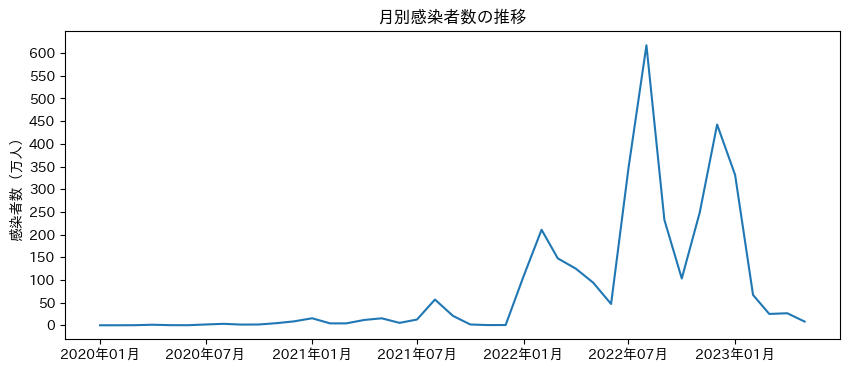

In [96]:
# 練習問題
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import datetime

df = pd.read_csv("/content/Monthly Infection Numbers.csv")
df.head()

X_dt = pd.to_datetime(df['Date'])
x_jiku = [X_dt[i] for i in range(0, len(df), 6)]
x_jiku_str = [x.strftime("%Y年%m月") for x in x_jiku]

# plot
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(X_dt, df['ALL'])

# set_ticks set_labels
ax.set_xticks(x_jiku, x_jiku_str)
ax.set_ylabel("感染者数（万人）")
ax.set_yticks(list(range(0, 6500000, 500000)), list(range(0, 650, 50)))
ax.set_title("月別感染者数の推移")

print(len(df))